### Introduction to Digital Earth Africa and the African Data Cube

In [19]:
# Load Data Cube Configuration
import datacube
# Enable importing of utilities.
import sys
import os

# Supress Warning 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from odc.ui import DcViewer
from datacube.helpers import write_geotiff

#import DE Africa script
sys.path.append('../Scripts')
from deafrica_plotting import display_map, rgb
from deafrica_datahandling import load_ard

In [3]:
#introduce yourself and state your purpose
dc = datacube.Datacube(app="access_Sentinel2")

In [4]:
#whats available?
products = dc.list_products()

display_columns = ["name",
                   "description",
                   "platform",
                   "instrument",
                   "crs",
                   "resolution"]

products[display_columns].sort_index()

,name,description,platform,instrument,crs,resolution
id,,,,,,
1,ls8_usgs_sr_scene,Landsat 8 USGS Collection 1 Higher Level SR sc...,LANDSAT_8,OLI_TIRS,NaN,NaN
2,ls7_usgs_sr_scene,Landsat 7 USGS Collection 1 Level2 Surface Ref...,LANDSAT_7,ETM,NaN,NaN
3,ls5_usgs_sr_scene,Landsat 5 USGS Collection 1 Level2 Surface Ref...,LANDSAT_5,TM,NaN,NaN
5,ls_usgs_wofs_scene,Historic Flood Mapping Water Observations from...,None,None,NaN,NaN
6,ls_usgs_fc_scene,Landsat Fractional Cover based on USGS Level 2...,None,None,NaN,NaN
11,ls_usgs_wofs_summary,Water Observations from Space Annual Statistics,None,None,ESRI:102022,"(-30, 30)"
12,srtm,1 second elevation model,SRTM,SIR,EPSG:4326,"(-0.00027777777778, 0.00027777777778)"
13,ga_ls8c_wofs_2_annual_summary,Water Observations from Space Annual Statistics,None,None,EPSG:6933,"(-30, 30)"
14,alos_palsar_mosaic,ALOS/PALSAR and ALOS-2/PALSAR-2 annual mosaic ...,ALOS/ALOS-2,PALSAR/PALSAR-2,EPSG:4326,"(-0.000222222222222, 0.000222222222222)"


In [5]:
#have a look at Sentinel-2B
product = "s2b_msil2a"

measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
coastal_aerosol,coastal_aerosol,uint16,1,0,"[band_01, B01]",NaN
blue,blue,uint16,1,0,"[band_02, B02]",NaN
green,green,uint16,1,0,"[band_03, B03]",NaN
red,red,uint16,1,0,"[band_04, B04]",NaN
red_edge_1,red_edge_1,uint16,1,0,"[band_05, B05]",NaN
red_edge_2,red_edge_2,uint16,1,0,"[band_06, B06]",NaN
red_edge_3,red_edge_3,uint16,1,0,"[band_07, B07]",NaN
nir_1,nir_1,uint16,1,0,"[band_08, B08]",NaN
nir_2,nir_2,uint16,1,0,"[band_8a, B8A]",NaN


In [37]:
# Set the central latitude and longitude - Cape Town
central_lat = 18.62
central_lon = -33.95

# Set the buffer to load around the central coordinates
buffer = 0.1

# Compute the bounding box for the study area
study_area_lat = (central_lat - buffer, central_lat + buffer)
study_area_lon = (central_lon - buffer, central_lon + buffer)

In [38]:
DcViewer(dc=dc, 
         time='2020',
         center=(central_lon, central_lat),
         zoom=11)

In [39]:
# Set the data source 
set_product = ['s2a_msil2a','s2b_msil2a']

# Set the date range 
set_time = ("2019-01-01", "2020-06-01")

# Set the measurements/bands 
set_measurements = [
    "red",
    "blue",
    "green",
    "nir_1", "swir_1"]

# Set the coordinate reference system and output resolution
# epsg:32734 UTM 34S
set_crs = 'epsg:32734'

set_resolution = (-10, 10)

In [40]:
ds = load_ard(dc=dc,
              products=set_product,
              x=study_area_lat,
              y=study_area_lon,
              time=set_time,
              measurements = set_measurements,
              output_crs=set_crs,
              align=(5, 5),
              resolution=set_resolution,
              group_by='solar_day',
              dask_chunks={'x':100, 'y':100})

# Print output data
print(ds)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2a_msil2a
    s2b_msil2a
Applying pixel quality/cloud mask
Returning 1 time steps as a dask array
<xarray.Dataset>
Dimensions:      (time: 1, x: 1901, y: 2262)
Coordinates:
  * y            (y) float64 6.252e+06 6.252e+06 6.252e+06 ... 6.23e+06 6.23e+06
    spatial_ref  int32 0
  * x            (x) float64 2.706e+05 2.706e+05 ... 2.895e+05 2.896e+05
  * time         (time) datetime64[ns] 2020-01-01T08:49:48.578000
Data variables:
    red          (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    blue         (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    green        (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    nir_1        (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    swir_1       (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
Attributes:
    crs:           epsg:32734
 

In [41]:
#how many images are there?
print('There is/are:', len(ds.time), 'image/s available')

There is/are: 1 image/s available


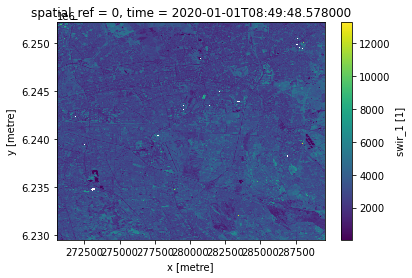

In [42]:
#plot the swir_1 band of the image
first_timestep = ds.swir_1.isel(time=0)
first_timestep.plot()

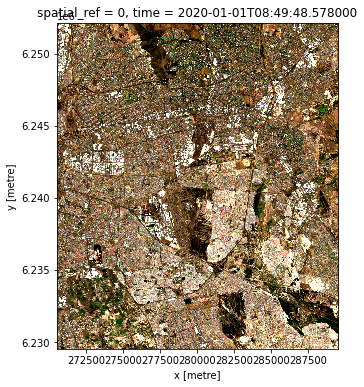

In [43]:
#plot the rgb
rgb(ds, bands=['red', 'green', 'blue'], index=0, percentile_stretch=[0.05, 0.95])

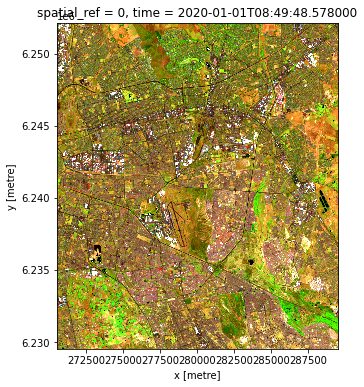

In [44]:
# View a swir1, nir, green (false colour)
rgb(ds, bands=['swir_1', 'nir_1', 'green'], index=0)